# Iris - using keras

In [8]:
import pandas as pd

df = pd.read_csv('iris_dataset.csv')

data = df.values

X = data[:,:-1]
y = data[:,-1]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)

model = LogisticRegression(random_state=0).fit(X, y)


In [11]:
model.predict(X[:2, :])

array(['Iris-setosa', 'Iris-setosa'], dtype=object)

In [12]:
model.predict_proba(X[:2, :])

array([[9.81748306e-01, 1.82516800e-02, 1.43428735e-08],
       [9.71721105e-01, 2.82788652e-02, 2.98017348e-08]])

In [13]:
model.score(X, y)

0.9733333333333334

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.models import Model

In [15]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 156s 14us/step


In [16]:
model=keras.models.Sequential([tf.keras.layers.Flatten(),  tf.keras.layers.Dense(128, activation = tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [17]:
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics =['accuracy']) 
  
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8116 - loss: 7.2080
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9046 - loss: 0.3870
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9303 - loss: 0.2681
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9388 - loss: 0.2423
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9444 - loss: 0.2223


In [18]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.2998


[0.26411697268486023, 0.9366000294685364]

# House Price estimate

# 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler # Standardization
from sklearn.ensemble import IsolationForest # Outlier Detection
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback
from keras.optimizers import Adam # Optimizer
from kerastuner.tuners import RandomSearch # HyperParameter Tuning
import warnings
warnings.filterwarnings('ignore') # To ignore warnings.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14136\2677154759.py:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch # HyperParameter Tuning


In [26]:
train = pd.read_csv('house-price/train.csv')
test = pd.read_csv('house-price/test.csv')
y = train['SalePrice'].values
data = pd.concat([train,test],axis=0,sort=False)
data.drop(['SalePrice'],axis=1,inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [27]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(data)
missing_values_data

,Feature,Number of Missing Values,Percentage of Missing Values
0,PoolQC,2909,99.657417
1,MiscFeature,2814,96.402878
2,Alley,2721,93.216855
3,Fence,2348,80.438506
4,MasVnrType,1766,60.500171
5,FireplaceQu,1420,48.646797
6,LotFrontage,486,16.649538
7,GarageFinish,159,5.447071
8,GarageQual,159,5.447071
9,GarageCond,159,5.447071


In [28]:
data['BsmtFinSF1'].fillna(0, inplace=True)
data['BsmtFinSF2'].fillna(0, inplace=True)
data['TotalBsmtSF'].fillna(0, inplace=True)
data['BsmtUnfSF'].fillna(0, inplace=True)
data['Electrical'].fillna('FuseA',inplace = True)
data['KitchenQual'].fillna('TA',inplace=True)
data['LotFrontage'].fillna(data.groupby('1stFlrSF')['LotFrontage'].transform('mean'),inplace=True)
data['LotFrontage'].interpolate(method='linear',inplace=True)
data['MasVnrArea'].fillna(data.groupby('MasVnrType')['MasVnrArea'].transform('mean'),inplace=True)
data['MasVnrArea'].interpolate(method='linear',inplace=True)

In [29]:
for col in NAN_col:
    data_type = data[col].dtype
    if data_type == 'object':
        data[col].fillna('NA',inplace=True)
    else:
        data[col].fillna(data[col].mean(),inplace=True)

In [30]:
data['Total_Square_Feet'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF'])

data['Total_Bath'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_Porch_Area'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF'])

data['SqFtPerRoom'] = data['GrLivArea'] / (data['TotRmsAbvGrd'] + data['FullBath'] + data['HalfBath'] + data['KitchenAbvGr'])

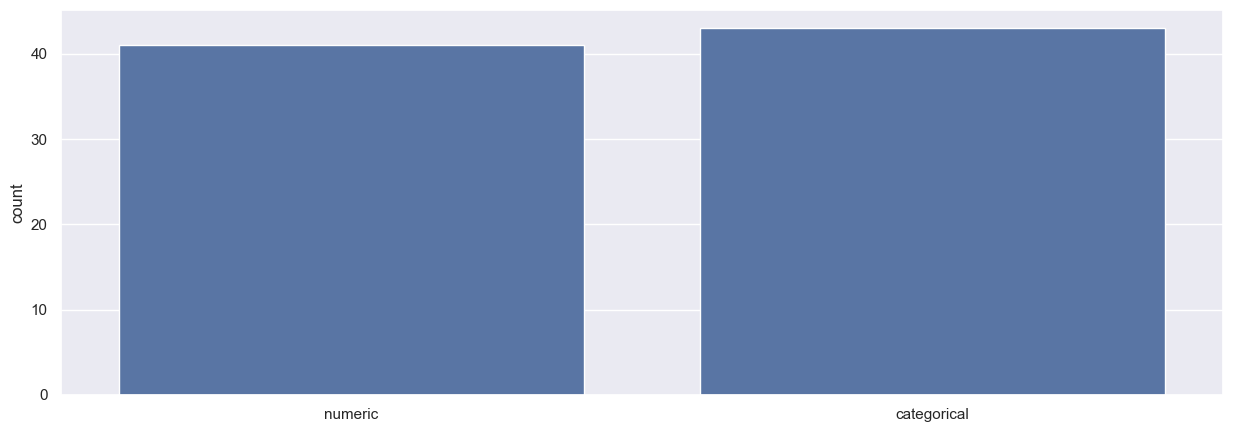

In [31]:
column_data_type = []
for col in data.columns:
    data_type = data[col].dtype
    if data[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(15,5))
sns.countplot(x=column_data_type)
plt.show()

In [32]:
data = pd.get_dummies(data)

In [33]:
train = data[:1460].copy()
test = data[1460:].copy()
train['SalePrice'] = y

<Axes: >

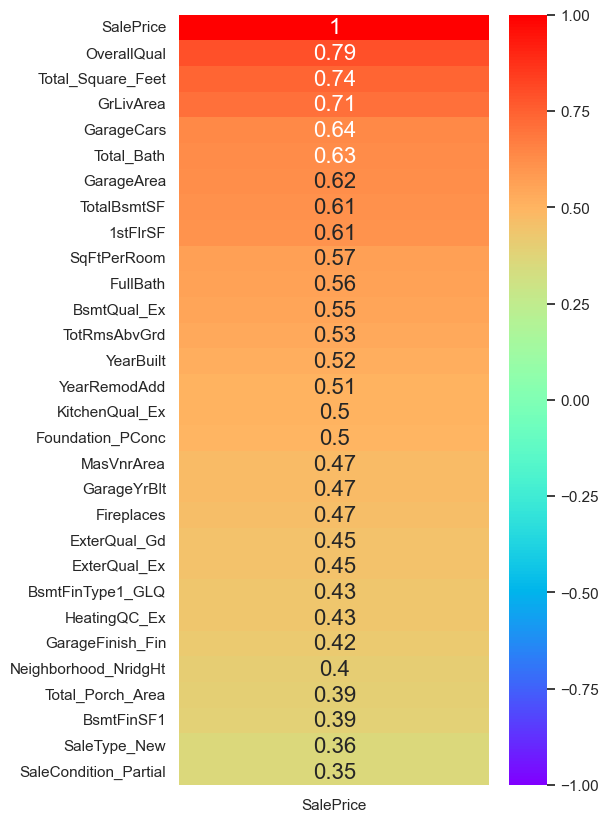

In [34]:
top_features = train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [35]:
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.countplot(train[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.distplot(train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')

In [42]:
X = train.copy()
X.drop(['SalePrice'],axis=1,inplace=True) # Dropped the y feature
y = train['SalePrice'].values

In [43]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'mse')
    return model
model = create_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 320)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 384)            │       123,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 352)            │       135,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 448)            │       158,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 160)            │        71,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 160)            │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,193 (2.37 MB)

 Trainable params: 620,193 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 39260831744.0000 - val_loss: 34942824448.0000
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40891092992.0000 - val_loss: 34339946496.0000
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 38282276864.0000 - val_loss: 32805083136.0000
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35944038400.0000 - val_loss: 29093103616.0000
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29611497472.0000 - val_loss: 21021511680.0000
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22114428928.0000 - val_loss: 9055799296.0000
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13057288192.0000 - val_loss: 5593236480.0000
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16333113344.0000 - val_loss: 5541183488.0000
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8020447744.0000 - val_loss: 4843954176.0000
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0

<Axes: >

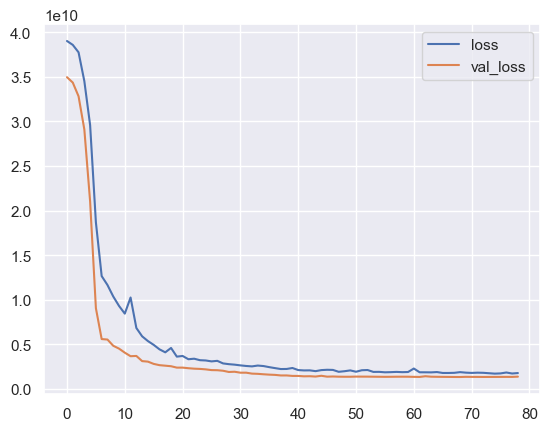

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X,y=y,
          validation_split=0.1,
          batch_size=128,epochs=1000, callbacks=[early_stop])
losses = pd.DataFrame(model.history.history)
losses.plot()

Epoch 1/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 39070392320.0000
Epoch 2/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 38800654336.0000
Epoch 3/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39303884800.0000
Epoch 4/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 35105271808.0000
Epoch 5/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29503750144.0000
Epoch 6/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18106148864.0000
Epoch 7/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9710339072.0000
Epoch 8/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8253558784.0000
Epoch 9/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8366730752.0000
Epoch 10/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8662084608.0000
Epoch 11/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7508089344.0000
Epoch 12/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5696843776.0000
Epoch 13/170
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5511679488.0000
Ep

<Axes: >

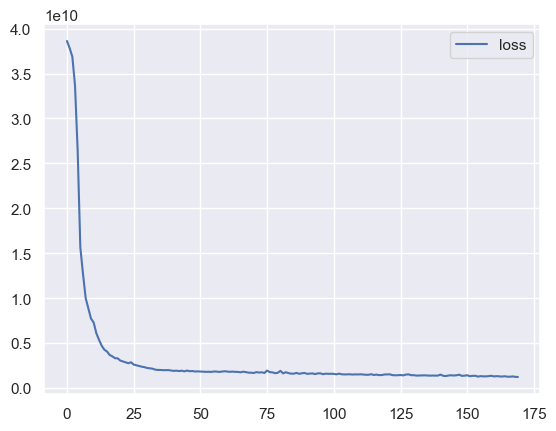

In [45]:
model = create_model() # Resetting the model.
history = model.fit(x=X,y=y,
          batch_size=128,epochs=170)
losses = pd.DataFrame(model.history.history)
losses.plot()

In [48]:
X_test = scale.transform(test) # Scaling the testing data.
result = model.predict(X_test) # Prediction using model
result = pd.DataFrame(result,columns=['SalePrice']) # Dataframe
result['Id'] = test['Id'] # Adding ID to our result dataframe.
result = result[['Id','SalePrice']]
result.head()

NameError: name 'scale' is not defined